In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/dataset_VinhLong.csv')
df.shape

(99312, 9)

In [ ]:
df.head()

,date_time,tempC,humidity,pressure,precipMM,uvIndex,windspeedKmph,winddirDegree,weatherDesc
0,2020-02-01 00:00:00,22,72,1013,0.0,1,13,116,Clear
1,2020-02-01 01:00:00,22,73,1013,0.0,1,13,115,Clear
2,2020-02-01 02:00:00,22,74,1013,0.0,1,13,113,Clear
3,2020-02-01 03:00:00,22,76,1013,0.0,1,13,111,Partly cloudy
4,2020-02-01 04:00:00,22,77,1013,0.0,1,13,108,Clear


In [ ]:
df.sort_values(by='date_time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,date_time,tempC,humidity,pressure,precipMM,uvIndex,windspeedKmph,winddirDegree,weatherDesc
0,2013-01-01 00:00:00,25,84,1010,0.0,1,2,41,Clear
1,2013-01-01 01:00:00,24,83,1010,0.0,1,3,137,Clear
2,2013-01-01 02:00:00,24,82,1009,0.0,1,4,234,Partly cloudy
3,2013-01-01 03:00:00,24,81,1009,0.0,1,5,331,Partly cloudy
4,2013-01-01 04:00:00,24,80,1010,0.0,1,7,333,Partly cloudy
...,...,...,...,...,...,...,...,...,...
99307,2024-04-30 19:00:00,32,54,1005,0.0,1,17,167,Clear
99308,2024-04-30 20:00:00,31,61,1006,0.0,1,15,171,Clear
99309,2024-04-30 21:00:00,30,66,1007,0.0,1,13,174,Clear
99310,2024-04-30 22:00:00,29,70,1007,0.0,1,12,176,Clear


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99312 entries, 0 to 99311
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_time      99312 non-null  object 
 1   tempC          99312 non-null  int64  
 2   humidity       99312 non-null  int64  
 3   pressure       99312 non-null  int64  
 4   precipMM       99312 non-null  float64
 5   uvIndex        99312 non-null  int64  
 6   windspeedKmph  99312 non-null  int64  
 7   winddirDegree  99312 non-null  int64  
 8   weatherDesc    99312 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 6.8+ MB


In [ ]:
df.isna().sum()

date_time        0
tempC            0
humidity         0
pressure         0
precipMM         0
uvIndex          0
windspeedKmph    0
winddirDegree    0
weatherDesc      0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,date_time,tempC,humidity,pressure,precipMM,uvIndex,windspeedKmph,winddirDegree,weatherDesc


In [ ]:
# Selecting relevant columns
numeric_cols = ['tempC', 'humidity', 'pressure', 'precipMM', 'uvIndex', 'windspeedKmph', 'winddirDegree']
data_selected = df[numeric_cols]
data_selected.shape

(99312, 7)

In [ ]:
data_selected = data_selected.fillna(data_selected.mean())
data_selected.isna().sum()

tempC            0
humidity         0
pressure         0
precipMM         0
uvIndex          0
windspeedKmph    0
winddirDegree    0
dtype: int64

In [ ]:
data_selected.head()

,tempC,humidity,pressure,precipMM,uvIndex,windspeedKmph,winddirDegree
0,25,84,1010,0.0,1,2,41
1,24,83,1010,0.0,1,3,137
2,24,82,1009,0.0,1,4,234
3,24,81,1009,0.0,1,5,331
4,24,80,1010,0.0,1,7,333


In [ ]:
five_weeks_data = data_selected[:840]
five_weeks_data

,tempC,humidity,pressure,precipMM,uvIndex,windspeedKmph,winddirDegree
0,25,84,1010,0.0,1,2,41
1,24,83,1010,0.0,1,3,137
2,24,82,1009,0.0,1,4,234
3,24,81,1009,0.0,1,5,331
4,24,80,1010,0.0,1,7,333
...,...,...,...,...,...,...,...
835,26,78,1012,0.0,1,20,117
836,26,81,1013,0.0,1,20,115
837,25,84,1013,0.0,1,19,113
838,25,84,1013,0.0,1,19,110


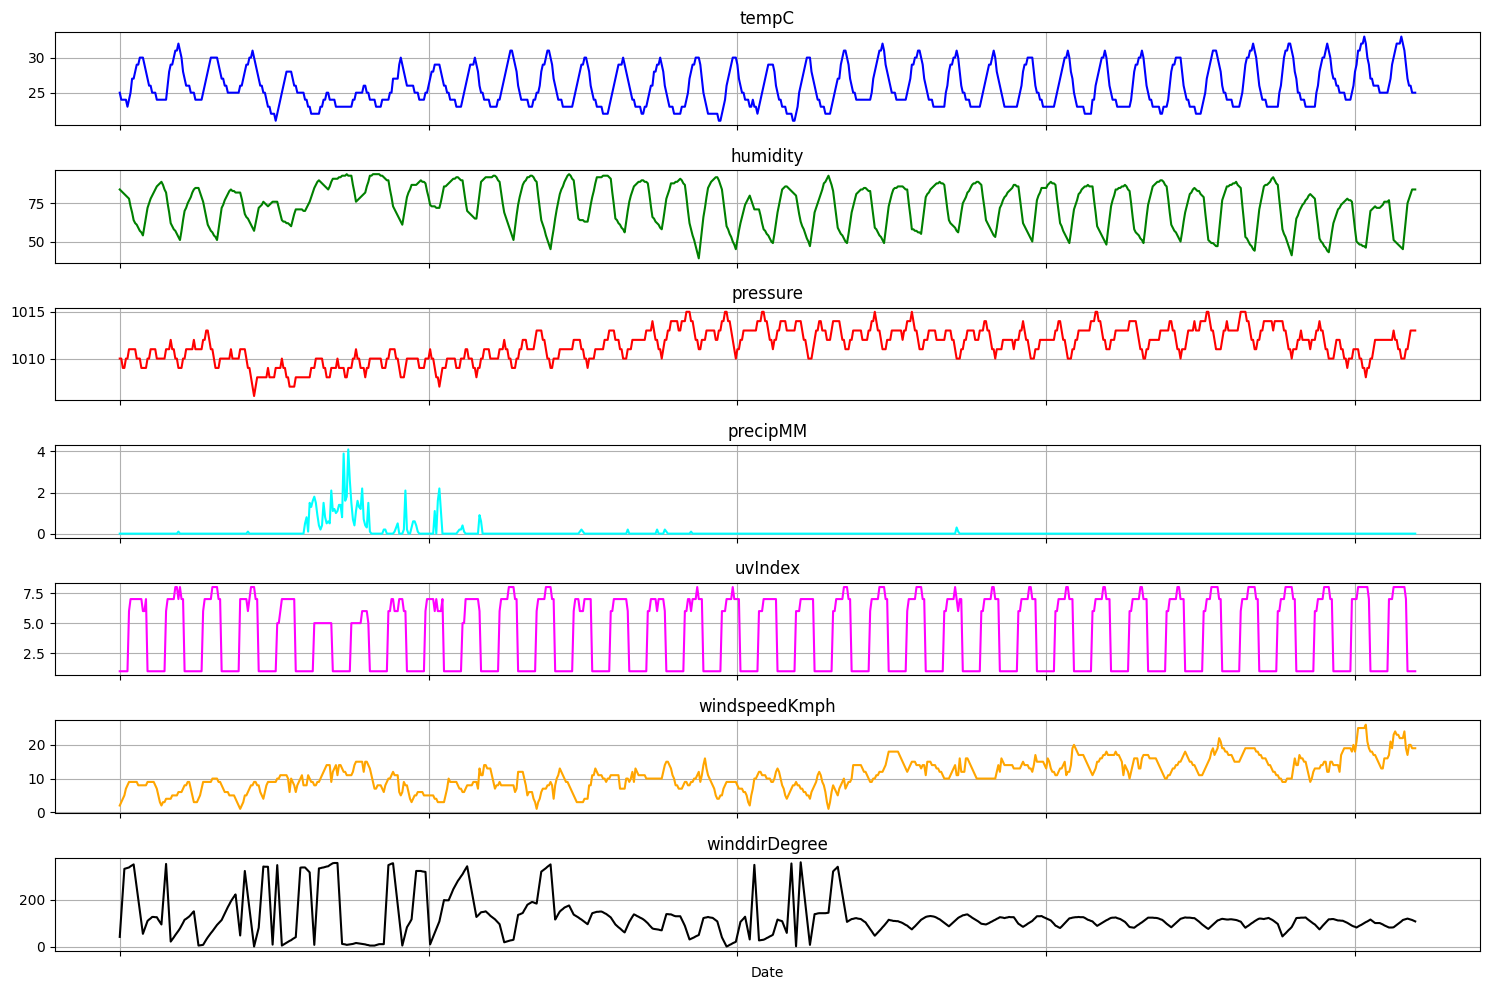

In [ ]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'black']
n_features = 7
plt.figure(figsize=(15, 10))

# Plot each feature with specified color and share the x-axis
for i, (feature, color) in enumerate(zip(five_weeks_data.columns, colors), 1):
    ax = plt.subplot(n_features, 1, i, sharex=ax if i > 1 else None)  # Share the x-axis
    five_weeks_data[feature].plot(ax=ax, color=color)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.grid(True)

    # Only show the x-axis label on the last subplot
    if i < n_features:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

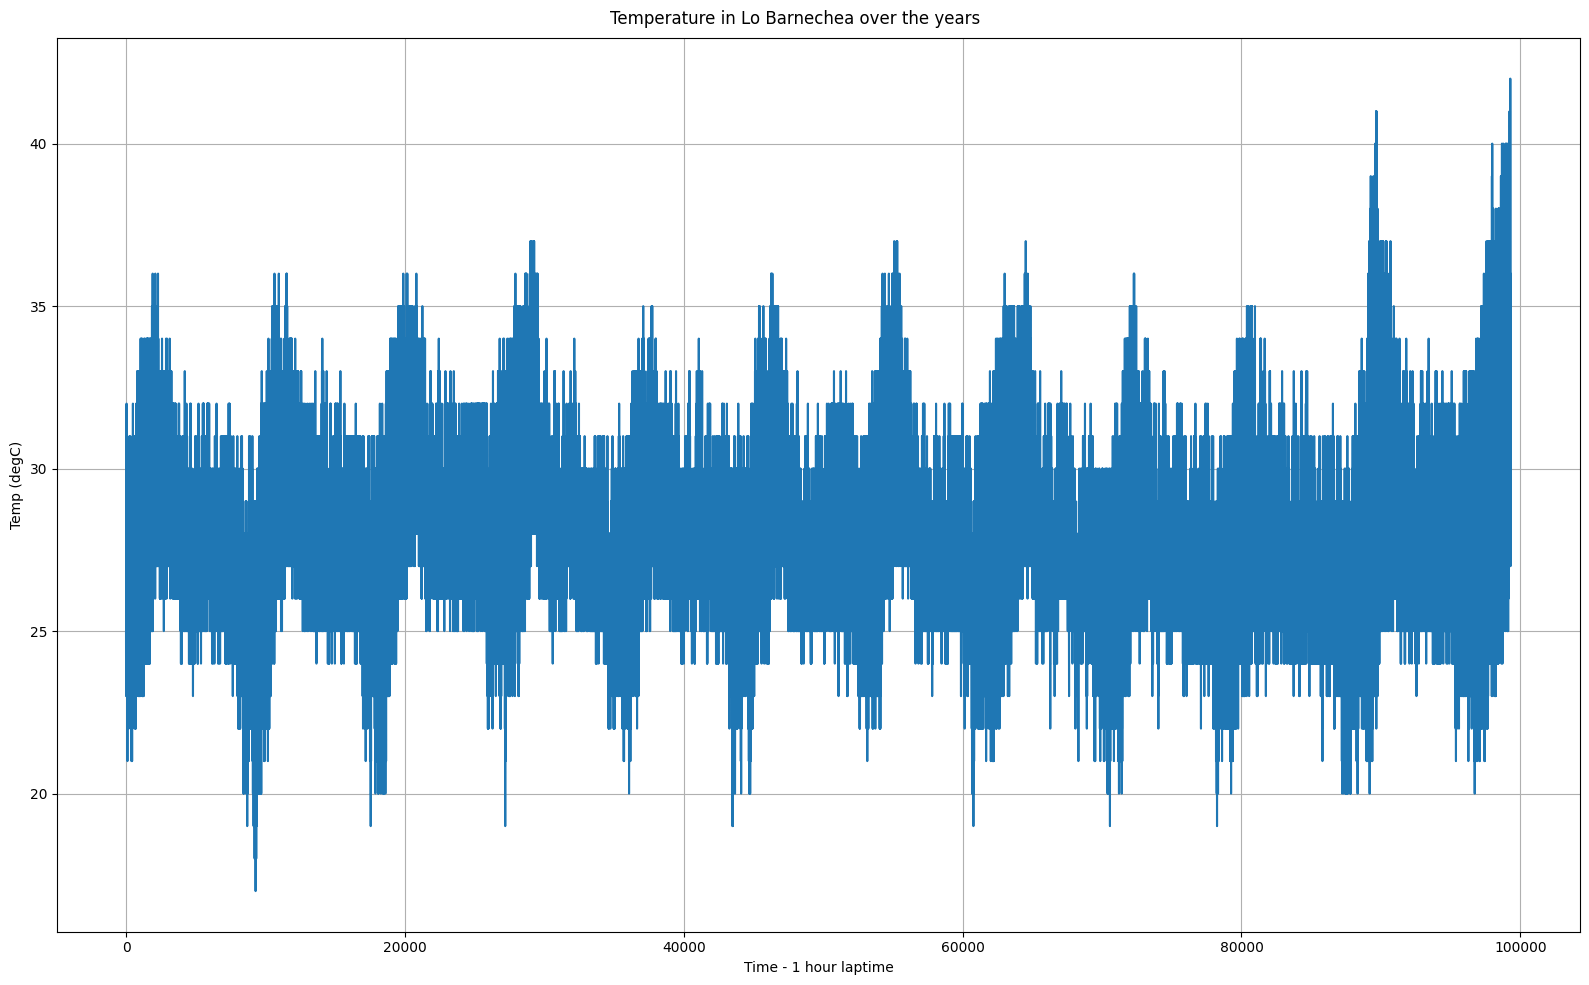

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 10))

ax1.set_xlabel('Time - 1 hour laptime')
ax1.set_ylabel('Temp (degC)')
ax1.plot(data_selected['tempC'], linestyle='-')
ax1.tick_params(axis='y')

# Optional: Add a title and adjust layout
plt.suptitle('Temperature in Lo Barnechea over the years')
plt.grid()
fig.tight_layout()  # adjust subplot parameters to give specified padding

plt.show()

In [ ]:
SPLIT = 0.8

In [ ]:
train_size = int(len(data_selected) * SPLIT)
val_size = int(len(data_selected) * (1-SPLIT)//2)
test_size = len(data_selected) - train_size - val_size

data_train = data_selected[:train_size]
data_val = data_selected[train_size:train_size + val_size]
data_test = data_selected[-test_size:]

data_train.shape, data_val.shape, data_test.shape


((79449, 7), (9931, 7), (9932, 7))

In [ ]:
train_size, val_size, test_size

(79449, 9931, 9932)

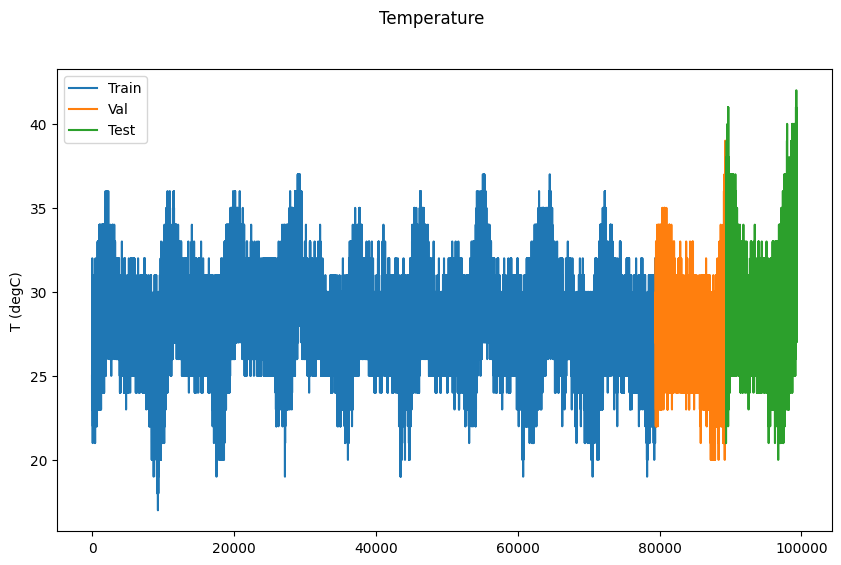

In [ ]:
plt.figure(figsize=(10, 6))
data_train['tempC'].plot(legend=True)
data_val['tempC'].plot(legend=True)
data_test['tempC'].plot(legend=True)
plt.legend(['Train', 'Val', 'Test']);
plt.suptitle('Temperature')
plt.ylabel('T (degC)');

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_normalized = scaler.fit_transform(data_train)
data_val_normalized = scaler.transform(data_val)
data_test_normalized = scaler.transform(data_test)

In [ ]:
# Save the scaler parameters to a text file
with open('scaler_params.txt', 'w') as file:
    file.write('scale:' + ','.join(map(str, scaler.scale_)) + '\n')
    file.write('min:' + ','.join(map(str, scaler.min_)) + '\n')
    file.write('data_min:' + ','.join(map(str, scaler.data_min_)) + '\n')
    file.write('data_max:' + ','.join(map(str, scaler.data_max_)) + '\n')
    file.write('data_range:' + ','.join(map(str, scaler.data_range_)) + '\n')


print(f'Train: {data_train_normalized.min()}, {data_train_normalized.max()}')
print(f'Test:  {data_test_normalized.min()}, {data_test_normalized.max()}')
print(f'Val:   {data_val_normalized.min()}, {data_val_normalized.max()}')

Train: 0.0, 1.0
Test:  -0.038961038961038974, 1.25
Val:   0.0, 1.1


In [ ]:
def create_sequences(input_data, n_steps, fut_hours, out_feat_index):
    X, y = [], []
    for i in range(len(input_data) - n_steps - fut_hours):
        # Define the end of the input sequence
        end_ix = i + n_steps
        # Define the end of the output sequence
        out_end_ix = end_ix + fut_hours
        # Ensure we have enough data for this instance
        if out_end_ix > len(input_data):
            break
        # Retrieve input and output
        seq_x, seq_y = input_data[i:end_ix, :], input_data[out_end_ix - 1, out_feat_index]  # i.e. 0 is the index for 'tempC'
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
output_feature = 'tempC'
out_feat_index = numeric_cols.index(output_feature)
fut_hours = 1
n_steps = 168
n_inputs = len(data_selected.columns)

In [ ]:
X_train, y_train = create_sequences(data_train_normalized, n_steps, fut_hours, out_feat_index)
X_val, y_val = create_sequences(data_val_normalized, n_steps, fut_hours, out_feat_index)
X_test, y_test = create_sequences(data_test_normalized, n_steps, fut_hours, out_feat_index)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(79280, 168, 7) (79280,)
(9763, 168, 7) (9763,)
(9762, 168, 7) (9762,)


In [ ]:
model = Sequential([
    LSTM(128,
         input_shape=(n_steps, X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True)

In [ ]:
BATCH = 32
EPOCHS = 20

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
2478/2478 [==============================] - 29s 10ms/step - loss: 0.0012 - val_loss: 8.3310e-04
Epoch 2/20
2478/2478 [==============================] - 24s 10ms/step - loss: 5.9271e-04 - val_loss: 6.6797e-04
Epoch 3/20
2478/2478 [==============================] - 29s 12ms/step - loss: 5.5873e-04 - val_loss: 5.9822e-04
Epoch 4/20
2478/2478 [==============================] - 23s 9ms/step - loss: 5.3832e-04 - val_loss: 6.4905e-04
Epoch 5/20
2478/2478 [==============================] - 22s 9ms/step - loss: 5.1831e-04 - val_loss: 6.4936e-04
Epoch 6/20
2478/2478 [==============================] - 23s 9ms/step - loss: 5.0142e-04 - val_loss: 5.9479e-04
Epoch 7/20
2478/2478 [==============================] - 25s 10ms/step - loss: 4.9607e-04 - val_loss: 5.7816e-04
Epoch 8/20
2478/2478 [==============================] - 24s 10ms/step - loss: 4.8779e-04 - val_loss: 5.6840e-04
Epoch 9/20
2478/2478 [==============================] - 23s 9ms/step - loss: 4.8794e-04 - val_loss: 6.0112e-04


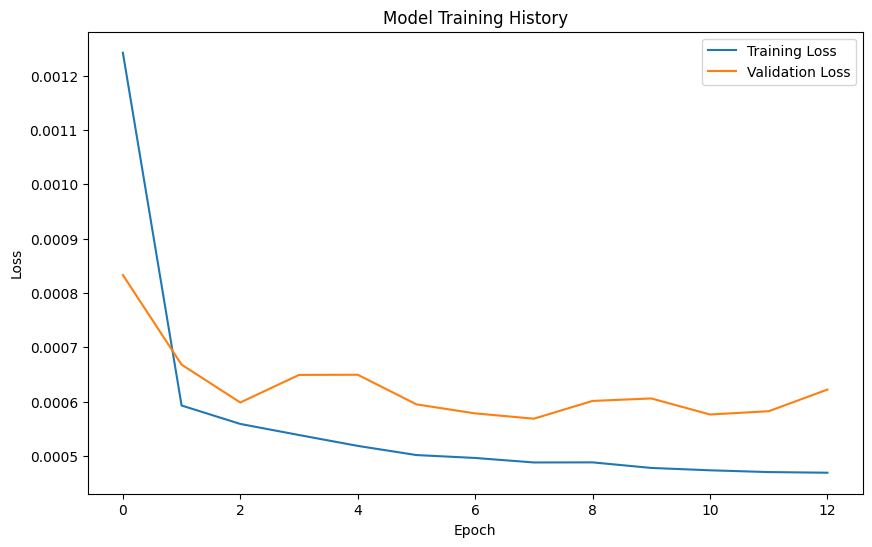

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from math import sqrt
err = model.evaluate(X_test, y_test)
print(f'  RMSE test:\t {sqrt(err):.3f}')

306/306 [==============================] - 1s 5ms/step - loss: 8.6705e-04
  RMSE test:	 0.029


In [ ]:
prediccion = model.predict(X_test)

306/306 [==============================] - 1s 4ms/step


In [ ]:
prediccion

array([[0.3561747 ],
       [0.34394327],
       [0.34398076],
       ...,
       [0.7125213 ],
       [0.65706164],
       [0.60971284]], dtype=float32)

In [ ]:
y_test

array([0.3 , 0.3 , 0.35, ..., 0.7 , 0.65, 0.6 ])

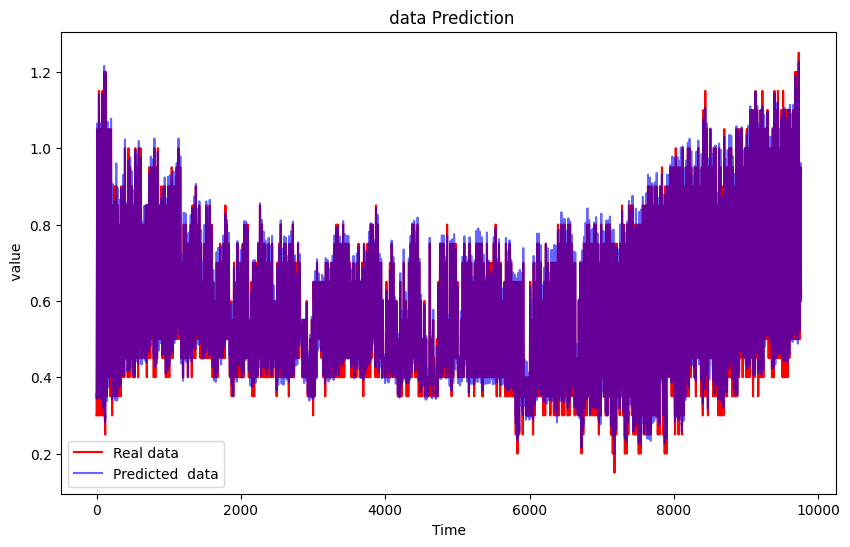

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(prediccion, color = 'blue', label = 'Predicted  data', alpha = 0.6)
plt.title(' data Prediction')
plt.xlabel('Time')
plt.ylabel(' value')
plt.legend()
plt.show()

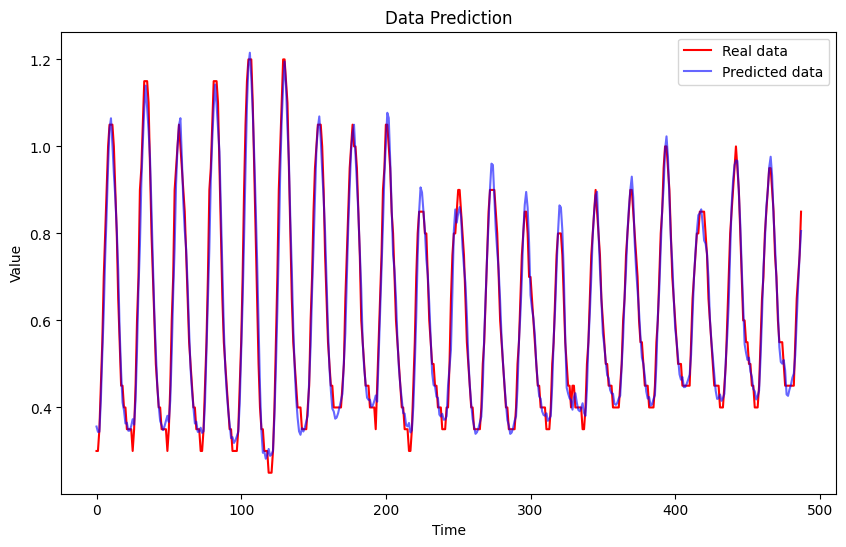

In [ ]:
plt.figure(figsize=(10, 6))
percentage = 0.05
data_length = len(y_test)
end_index = int(data_length * percentage)
plt.plot(y_test[:end_index], color='red', label='Real data')
plt.plot(prediccion[:end_index], color='blue', label='Predicted data', alpha=0.6)
plt.title('Data Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


306/306 [==============================] - 2s 6ms/step - loss: 8.6705e-04
Loss trên tập test: 0.001
306/306 [==============================] - 1s 4ms/step


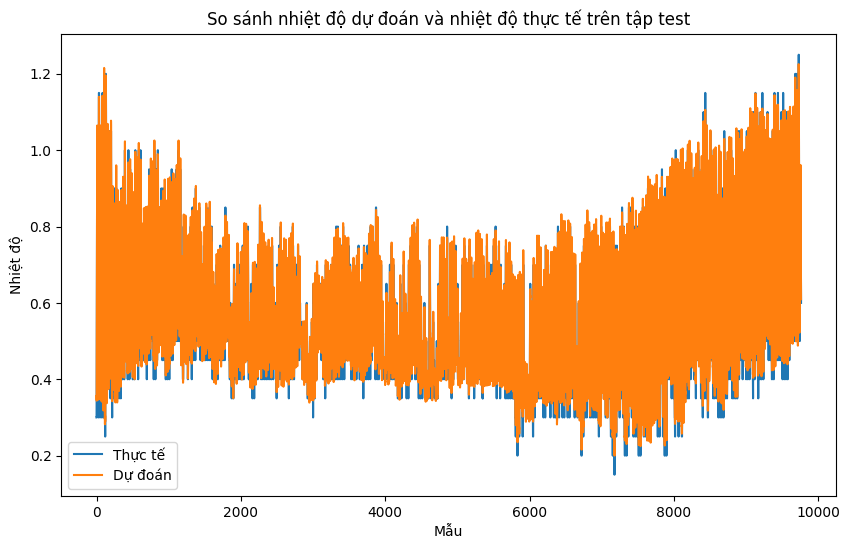

RMSE trên tập test: 0.029


In [ ]:
from math import sqrt

# Đánh giá mô hình trên tập test
test_loss = model.evaluate(X_test, y_test)
print(f'Loss trên tập test: {test_loss:.3f}')

# Dự đoán trên tập test
predictions = model.predict(X_test)

# Đồ thị so sánh giữa nhiệt độ dự đoán và nhiệt độ thực tế trên tập test
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(predictions, label='Dự đoán')
plt.title('So sánh nhiệt độ dự đoán và nhiệt độ thực tế trên tập test')
plt.xlabel('Mẫu')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

# Tính toán RMSE
rmse = sqrt(test_loss)
print(f'RMSE trên tập test: {rmse:.3f}')


In [ ]:
import random
import time
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
!pip install paho-mqtt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 999.3 kB/s eta 0:00:00


In [ ]:
run_model = tf.function(lambda x: model(x))

BATCH_SIZE = 1
STEPS = n_steps
INPUT_SIZE = n_inputs
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "keras_lstm"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

# Save the converted model to file
tflite_model_file = 'converted_model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

In [ ]:
interp = tf.lite.Interpreter(model_content=tflite_model)

# Allocate the tensors
interp.allocate_tensors()

# Get input/output layer information
i_details = interp.get_input_details()[0]
o_details = interp.get_output_details()[0]

In [ ]:
i_details

{'name': 'serving_default_x:0',
 'index': 0,
 'shape': array([  1, 168,   7], dtype=int32),
 'shape_signature': array([  1, 168,   7], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
o_details

{'name': 'StatefulPartitionedCall:0',
 'index': 22,
 'shape': array([1, 1], dtype=int32),
 'shape_signature': array([1, 1], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
!python -m pip install edgeimpulse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1


In [ ]:
import edgeimpulse as ei
ei.API_KEY = "ei_8e1dcfa932874d6e8808918261624dc4238042e64b40380d"

In [ ]:
try:
    profile = ei.model.profile(model=tflite_model,
                               device='espressif-esp32')
    print(profile.summary())
except Exception as e:
    print(f"Could not profile: {e}")

Target results for float32:
{
    "device": "espressif-esp32",
    "tfliteFileSizeBytes": 283008,
    "isSupportedOnMcu": true,
    "memory": {
        "tflite": {
            "ram": 116516,
            "rom": 324136,
            "arenaSize": 116300
        },
        "eon": {
            "ram": 96952,
            "rom": 304952
        }
    },
    "timePerInferenceMs": 37813
}


Performance on device types:
{
    "variant": "float32",
    "lowEndMcu": {
        "description": "Estimate for a Cortex-M0+ or similar, running at 40MHz",
        "timePerInferenceMs": 429890,
        "memory": {
            "tflite": {
                "ram": 116478,
                "rom": 319512
            },
            "eon": {
                "ram": 96920,
                "rom": 304840
            }
        },
        "supported": true
    },
    "highEndMcu": {
        "description": "Estimate for a Cortex-M7 or other high-end MCU/DSP, running at 240MHz",
        "timePerInferenceMs": 3398,
        "me

In [ ]:
download_dir = "./"
deploy_filename = "lstm_float32_model.zip"

In [ ]:
deploy_bytes = None
try:
    deploy_bytes = ei.model.deploy(tflite_model,
                                   model_output_type=ei.model.output_type.Regression(),
                                   deploy_target='arduino')
except Exception as e:
    print(f"Could not deploy: {e}")

# Write the downloaded raw bytes to a file
if deploy_bytes:
    with open(deploy_filename, 'wb') as f:
        f.write(deploy_bytes.getvalue())

In [ ]:
y_test[0]

0.30000000000000004

In [ ]:
X_test[0].shape

(168, 7)

In [ ]:
reshaped_test = X_test[0].reshape(-1)
reshaped_test.shape

(1176,)

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
reshaped_test

array([0.2       , 0.85714286, 0.52941176, 0.        , 0.        ,
       0.2       , 0.35555556, 0.2       , 0.8961039 , 0.58823529,
       0.        , 0.        , 0.06666667, 0.10833333, 0.25      ,
       0.92207792, 0.64705882, 0.        , 0.625     , 0.1       ,
       0.05277778, 0.3       , 0.80519481, 0.64705882, 0.        ,
       0.625     , 0.16666667, 0.16111111, 0.45      , 0.63636364,
       0.70588235, 0.        , 0.75      , 0.26666667, 0.10277778,
       0.55      , 0.41558442, 0.70588235, 0.        , 0.75      ,
       0.33333333, 0.01111111, 0.75      , 0.27272727, 0.70588235,
       0.        , 0.875     , 0.3       , 0.025     , 0.9       ,
       0.19480519, 0.58823529, 0.        , 0.875     , 0.2       ,
       0.09722222, 0.95      , 0.14285714, 0.52941176, 0.        ,
       1.        , 0.13333333, 0.22777778, 1.        , 0.1038961 ,
       0.41176471, 0.        , 1.        , 0.1       , 0.38888889,
       1.05      , 0.07792208, 0.35294118, 0.        , 1.     

In [ ]:
loaded_scaler_params = {}
with open('scaler_params.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split(':')
        loaded_scaler_params[key] = np.array([float(i) for i in value.split(',')])

# Create a new scaler instance and set its parameters
inference_scaler = MinMaxScaler()
inference_scaler.scale_ = loaded_scaler_params['scale']
inference_scaler.min_ = loaded_scaler_params['min']
inference_scaler.data_min_ = loaded_scaler_params['data_min']
inference_scaler.data_max_ = loaded_scaler_params['data_max']
inference_scaler.data_range_ = loaded_scaler_params['data_range']

In [ ]:
inference_scaler.data_min_.shape

(7,)

In [ ]:
data_min = inference_scaler.data_min_[0]
data_min

17.0

In [ ]:
data_max = inference_scaler.data_max_[0]
data_max

37.0

In [ ]:
value = 0.36065
temp = value * (data_max - data_min) + data_min
temp


24.213